In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active

In [129]:
# Functions
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])


###
###


def line_significance(timepoints, ci_inf, ci_sup, y_min_shad, y_max_shad, color_sh):
    for idx_t in range(  len(timepoints)-1 ):
        half = timepoints[1]/2 
        #if ci_inf[idx_t]<= 0 <= ci_sup[idx_t]:    #### inferior and superior
        #    plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        if ci_inf[idx_t]<= 0 : ### just superior
            plt.fill_between(  [timepoints[idx_t] - half, timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color='w', step= 'mid', alpha=0.3)
        
        else:
            plt.fill_between(  [timepoints[idx_t] - half,  timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color=color_sh, step= 'mid',alpha=0.3)


            
###


# from mlxtend.evaluate import permutation_test

# p_value = permutation_test(value, shuffle, method='approximate', num_rounds=10000, seed=0)
# print(p_value)





#         ## Plot the significance line
#         for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
#             all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
#             conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
#             conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
#             color_sign = pal[index_color]
#             y_min_shad = -7 - index_color
#             y_max_shad = -8 - index_color
#             line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)




###

def plot_decoding(df_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [-1, 25]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [-1, 25]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [-1, 25]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [-1, 32]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for idx_reg, reg in enumerate(['visual', 'ips', 'frontinf']):
            subj_sig = [data_cond.loc[(data_cond['region']==reg) & (data_cond['times']==t_) ].significant.sum() for t_ in data_cond.times.unique()]    
            ## at least 3 sign subjects
            l=[]
            for n in subj_sig:
                if n<=2:
                    l.append(0)
                else:
                    l.append(n)
            ##
            for idx, t_ in enumerate(Df_mc.times.unique()):
                plt.plot(t_, 13+(idx_reg*2) , marker = 'o', color=pal[idx_reg],  markersize=l[idx]*2 )
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( '', fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


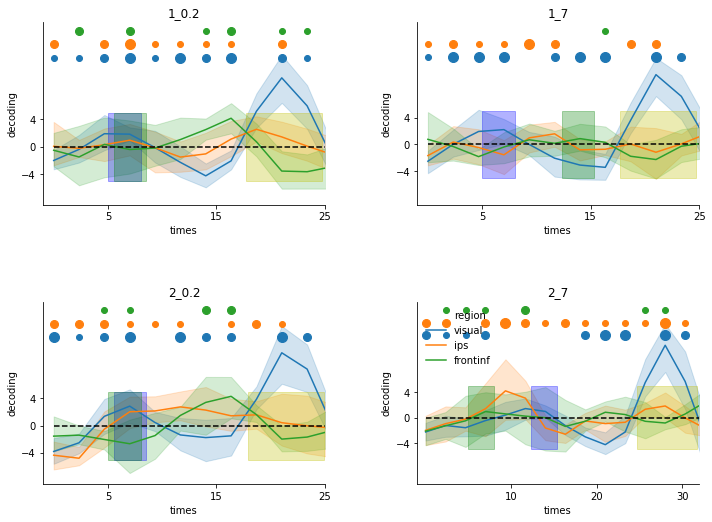

In [131]:
plot_decoding(Df_mc)

In [4]:
path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_t = pd.concat([Df, Df_shuff]) #concatenate the files

In [5]:
Df.size

11520

In [6]:
Df_shuff.size

1152000

In [19]:
Df_cond

,times,decoding,region,subject,condition,label
0,0.000,-1.616941,visual,n001,1_0.2,signal
1,2.335,3.720056,visual,n001,1_0.2,signal
2,4.670,5.503484,visual,n001,1_0.2,signal
3,7.005,2.175533,visual,n001,1_0.2,signal
4,9.340,-2.792470,visual,n001,1_0.2,signal
5,11.675,-5.425059,visual,n001,1_0.2,signal
6,14.010,-6.709548,visual,n001,1_0.2,signal
7,16.345,-3.772948,visual,n001,1_0.2,signal
8,18.680,6.070225,visual,n001,1_0.2,signal
9,21.015,14.554314,visual,n001,1_0.2,signal


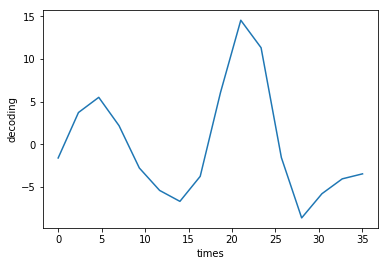

In [20]:
Df_cond = Df.loc[(Df['condition']=='1_0.2') & (Df['region']=='visual') & (Df['subject']=='n001')]
Df_cond

sns.lineplot(x="times", y="decoding", data=Df_cond) 

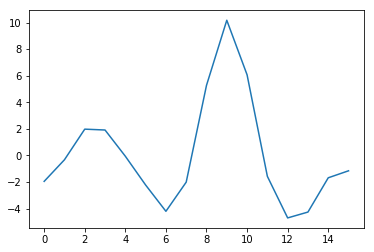

In [31]:
plt.plot([Df.loc[(Df['condition']=='1_0.2') & (Df['region']=='visual') & (Df['times']==t)].decoding.mean() for t in Df.times.unique()])

In [27]:
Df.loc[(Df['condition']=='1_0.2') & (Df['region']=='visual') & (Df['subject']=='n001') & (Df['times']==0)].decoding.values[0]

-1.616941347250161

In [65]:
Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & (Df['times']==time_)].decoding.values[0]

-4.23117554734062

In [66]:
Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)]

,times,decoding,region,subject,condition,label
15,35.025,3.020228,ips,n001,1_7,shuffle
15,35.025,4.146618,ips,n001,1_7,shuffle
15,35.025,4.949725,ips,n001,1_7,shuffle
15,35.025,6.615615,ips,n001,1_7,shuffle
15,35.025,0.483601,ips,n001,1_7,shuffle
15,35.025,5.203956,ips,n001,1_7,shuffle
15,35.025,3.950365,ips,n001,1_7,shuffle
15,35.025,4.282680,ips,n001,1_7,shuffle
15,35.025,2.955088,ips,n001,1_7,shuffle
15,35.025,1.627403,ips,n001,1_7,shuffle


In [76]:
from mlxtend.evaluate import permutation_test

p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=10000, seed=0)
print(p_value)

0.0


(array([ 3.,  6.,  8., 12., 16., 11., 19., 12.,  9.,  4.]),
 array([-2.37022601, -1.44433825, -0.51845048,  0.40743729,  1.33332505,
         2.25921282,  3.18510059,  4.11098835,  5.03687612,  5.96276389,
         6.88865165]),
 <a list of 10 Patch objects>)

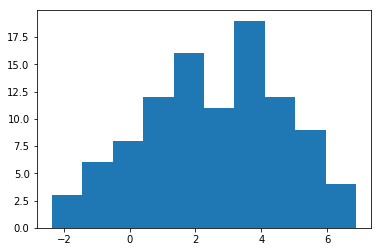

In [77]:
plt.hist(shuffl_values)

In [78]:
decoding_subj

-4.23117554734062

In [79]:

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=10000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value  ])
                
            
    

Df_mc = pd.DataFrame(mean_center)
Df_mc.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue']
Df_mc ## dataframe to plot


,condition,region,times,decoding,subject,significant,pvalue
0,1_0.2,visual,0.000,1.209258,l001,False,0.4608
1,1_0.2,visual,0.000,-1.115322,b001,True,0.0321
2,1_0.2,visual,0.000,-3.858745,s001,True,0.0000
3,1_0.2,visual,0.000,-3.015031,d001,True,0.0287
4,1_0.2,visual,0.000,-3.811561,r001,False,0.3127
5,1_0.2,visual,0.000,-1.583145,n001,False,0.1176
6,1_0.2,visual,2.335,0.037441,l001,False,0.5299
7,1_0.2,visual,2.335,-3.037878,b001,True,0.0026
8,1_0.2,visual,2.335,-3.495179,s001,True,0.0004
9,1_0.2,visual,2.335,1.254891,d001,False,0.2560


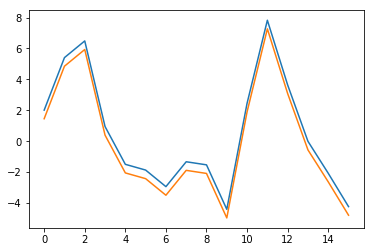

In [64]:
plt.plot(Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_)].decoding)
plt.plot(Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_)].decoding - Mean)

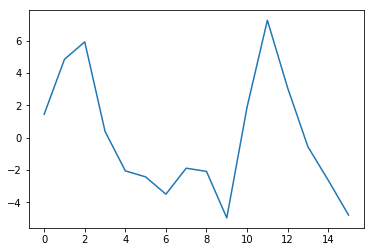

In [58]:
plt.plot(Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_)].decoding - Mean)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


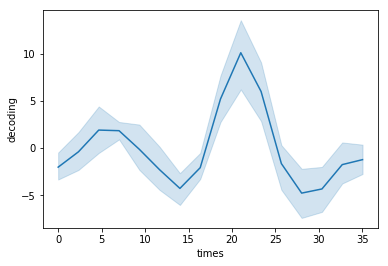

In [80]:
sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') ]) 

In [86]:
Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2')  & (Df_mc['times']==0) ].significant.sum()

3

In [92]:
subj_sig = [Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2')  & (Df_mc['times']==t_) ].significant.sum() for t_ in Df_mc.times.unique()]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


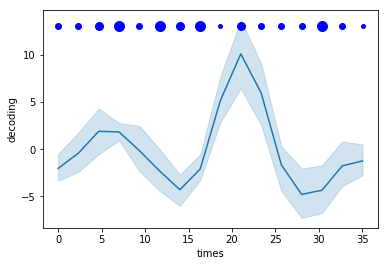

In [107]:

sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') ]) 
    
subj_sig = [Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2')  & (Df_mc['times']==t_) ].significant.sum() for t_ in Df_mc.times.unique()]    
    
for idx, t_ in enumerate(Df_mc.times.unique()):
    plt.plot(t_, 13, 'bo',  markersize=subj_sig[idx]*2 )

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


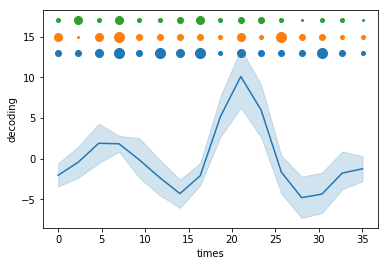

In [111]:
sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') ]) 


for idx_reg, reg in enumerate(['visual', 'ips', 'frontinf']):
    subj_sig = [Df_mc.loc[(Df_mc['region']==reg) & (Df_mc['condition']=='1_0.2')  & (Df_mc['times']==t_) ].significant.sum() for t_ in Df_mc.times.unique()]    
    for idx, t_ in enumerate(Df_mc.times.unique()):
        plt.plot(t_, 13+(idx_reg*2) , marker = 'o', color=pal[idx_reg],  markersize=subj_sig[idx]*2 )

In [110]:
pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
pal

['#1f77b4', '#ff7f0e', '#2ca02c']

In [105]:
subj_sig

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

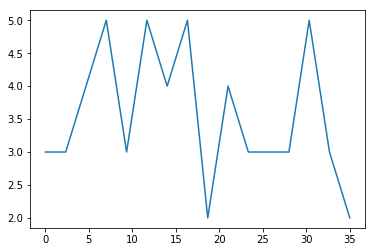

In [93]:
plt.plot(Df_mc.times.unique(), subj_sig)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


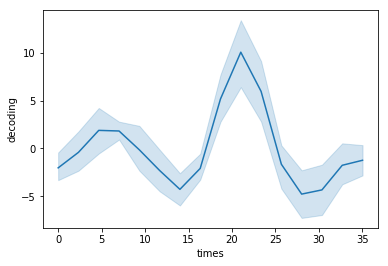

In [48]:
sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') ]) 

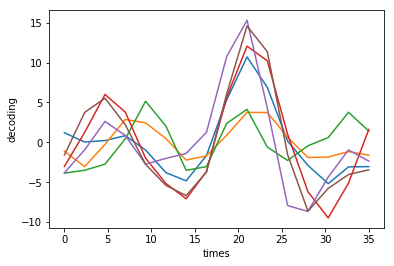

In [60]:


for subj_ in Df.subject.unique():
    sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') & (Df_mc['subject']==subj_)  ]) 


In [62]:
Df_mc.decoding.mean()

-1.572815951552305e-17

In [63]:
Df.decoding.mean()

0.00822896613513915

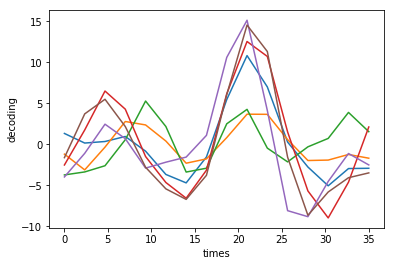

In [61]:
for subj_ in Df.subject.unique():
    sns.lineplot( x="times", y="decoding", data=Df.loc[(Df['region']=='visual') & (Df['condition']=='1_0.2') & (Df['subject']==subj_)  ]) 


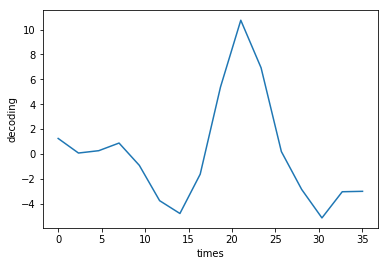

In [37]:
sns.lineplot( x="times", y="decoding", data=Df_mc.loc[(Df_mc['region']=='visual') & (Df_mc['condition']=='1_0.2') & (Df_mc['subject']=='l001')  ]) 

In [ ]:

Df_cond = Df.loc[(Df.loc['condition']=='1_0.2') & (Df.loc['region']=='visual') & (Df.loc['subject']=='n001')]

sns.lineplot( ax=ax, x="time", y="old_mean", hue='brain_reg', hue_order =  ['visual', 'ips', 'frontinf'], ci=None, palette=pal, data=Df_cond) 

In [28]:
Df.condition.unique()

array(['1_0.2', '2_7', '2_0.2', '1_7'], dtype=object)